# 留出法

In [3]:
library(mlr3verse)

# 加载企鹅数据集
tsk_penguins <- tsk("penguins")

# 划分训练集和测试集
splits <- partition(tsk_penguins)

# 创建决策树分类器
lrn_rpart <- lrn("classif.rpart")

# 在训练集上训练模型
lrn_rpart$train(tsk_penguins, splits$train)

# 在测试集上进行预测
prediction <- lrn_rpart$predict(tsk_penguins, splits$test)

In [ ]:
prediction$score(msr("classif.acc"))

# classif.acc: 0.947368421052632

classif.acc 
  0.9473684

# 重采样

## 构建重采样策略

In [5]:
as.data.table(mlr_resamplings)

key,label,params,iters
<chr>,<chr>,<list>,<dbl>
bootstrap,Bootstrap,"ratio , repeats",30
custom,Custom Splits,,NA
custom_cv,Custom Split Cross-Validation,,NA
cv,Cross-Validation,folds,10
holdout,Holdout,ratio,1
insample,Insample Resampling,,1
loo,Leave-One-Out,,NA
nested_cv,Nested CV,"folds , repeats",250
paired_subsampling,Paired Subsampling,"repeats_in , repeats_out, ratio",315


In [ ]:
rsmp("holdout", ratio = 0.8)

# <ResamplingHoldout>: Holdout
# * Iterations: 1
# * Instantiated: FALSE
# * Parameters: ratio=0.8

<ResamplingHoldout>: Holdout
* Iterations: 1
* Instantiated: FALSE
* Parameters: ratio=0.8

In [11]:
# 三折交叉验证
cv3 <- rsmp("cv", folds = 3)

# 3次重复、9/10比例的子抽样
ss390 <- rsmp("subsampling", repeats = 3, ratio = 0.9)

# 2次重复的5折交叉验证
rcv25 <- rsmp("repeated_cv", repeats = 2, folds = 5)

In [14]:
cv3$instantiate(tsk_penguins)

cv3$train_set(1)[1:5]

[1]  5  7  9 11 12

## 重采样实验

In [ ]:
rr <- resample(tsk_penguins, lrn_rpart, cv3)
rr

# <ResampleResult> with 3 resampling iterations
#   task_id    learner_id resampling_id iteration     prediction_test warnings
#  penguins classif.rpart            cv         1 <PredictionClassif>        0
#  penguins classif.rpart            cv         2 <PredictionClassif>        0
#  penguins classif.rpart            cv         3 <PredictionClassif>        0
#  errors
#       0
#       0
#       0

INFO  [14:04:02.694] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/3)
INFO  [14:04:02.735] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 2/3)
INFO  [14:04:02.750] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 3/3)


<ResampleResult> with 3 resampling iterations
  task_id    learner_id resampling_id iteration     prediction_test warnings
 penguins classif.rpart            cv         1 <PredictionClassif>        0
 penguins classif.rpart            cv         2 <PredictionClassif>        0
 penguins classif.rpart            cv         3 <PredictionClassif>        0
 errors
      0
      0
      0

In [23]:
library(tidyverse)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.2     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
acc <- rr$score(msr("classif.ce"))
acc[, .(iteration, classif.ce)] %>% print()

# iteration classif.ce
#        <int>      <num>
# 1:         1 0.06086957
# 2:         2 0.02608696
# 3:         3 0.07017544

   iteration classif.ce
       <int>      <num>
1:         1 0.06086957
2:         2 0.02608696
3:         3 0.07017544


In [ ]:
rr$aggregate(msr("classif.ce"))

# classif.ce: 0.0523773201118739

classif.ce 
0.05237732

In [ ]:
rr$aggregate(msr("classif.ce", average = "micro"))

# classif.ce: 0.0523255813953488

classif.ce 
0.05232558

In [31]:
msr()$average()

ERROR: Error: attempt to apply non-function


In [ ]:
msr("classif.ce")$average

# msr("classif.ce")$average

[1] "macro"

INFO  [14:20:04.604] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/10)
INFO  [14:20:04.632] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 2/10)
INFO  [14:20:04.642] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 3/10)
INFO  [14:20:04.649] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 4/10)
INFO  [14:20:04.658] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 5/10)
INFO  [14:20:04.667] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 6/10)
INFO  [14:20:04.676] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 7/10)
INFO  [14:20:04.684] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 8/10)
INFO  [14:20:04.691] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 9/10)
INFO  [14:20:04.700] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 10/10)


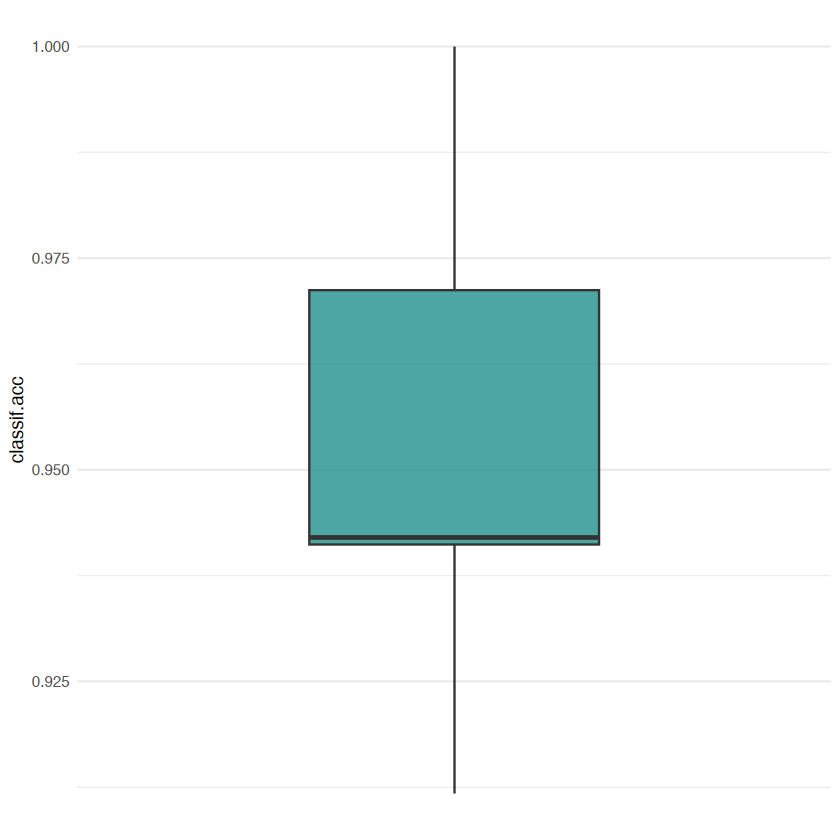

In [35]:
rr <- resample(tsk_penguins, lrn_rpart, rsmp("cv", folds = 10))
autoplot(rr, measure = msr("classif.acc"), type = "boxplot")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


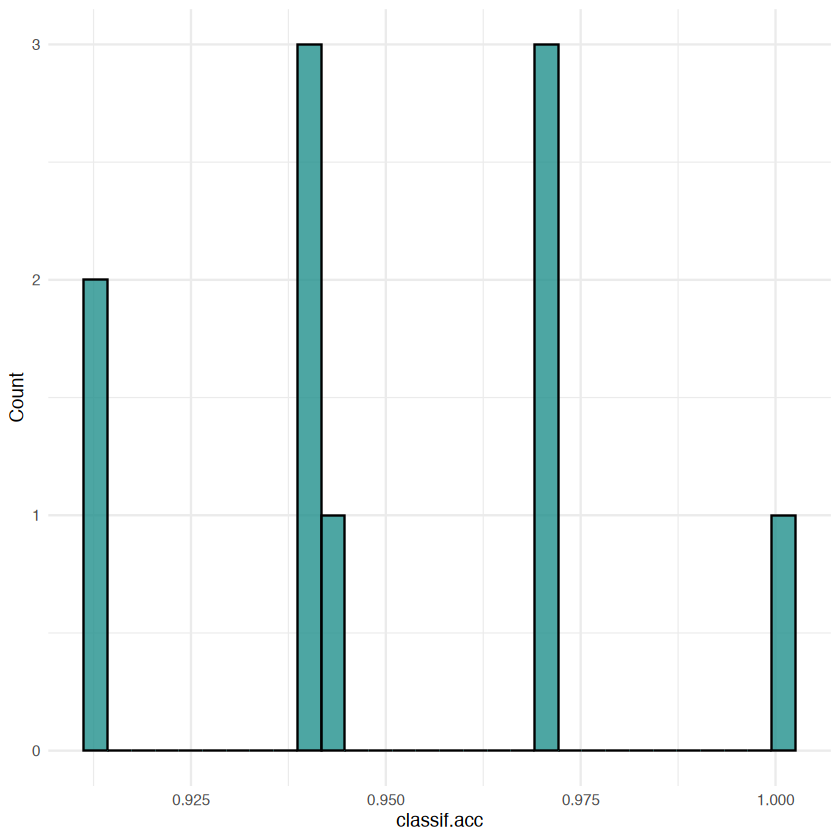

In [37]:
autoplot(rr, measure = msr("classif.acc"), type = "histogram")

## 重采样结果对象

In [ ]:
# 提取结果列表
rrp <- rr$predictions()
rrp[1:2]

# [[1]]
# <PredictionClassif> for 35 observations:
#  row_ids     truth  response
#       20    Adelie Chinstrap
#       27    Adelie    Adelie
#       31    Adelie    Adelie
#      ---       ---       ---
#      295 Chinstrap Chinstrap
#      305 Chinstrap Chinstrap
#      339 Chinstrap Chinstrap

# [[2]]
# <PredictionClassif> for 35 observations:
#  row_ids     truth  response
#        4    Adelie    Adelie
#       12    Adelie    Adelie
#       17    Adelie    Adelie
#      ---       ---       ---
#      319 Chinstrap Chinstrap
#      334 Chinstrap Chinstrap
#      342 Chinstrap Chinstrap

[[1]]
<PredictionClassif> for 35 observations:
 row_ids     truth  response
      20    Adelie Chinstrap
      27    Adelie    Adelie
      31    Adelie    Adelie
     ---       ---       ---
     295 Chinstrap Chinstrap
     305 Chinstrap Chinstrap
     339 Chinstrap Chinstrap

[[2]]
<PredictionClassif> for 35 observations:
 row_ids     truth  response
       4    Adelie    Adelie
      12    Adelie    Adelie
      17    Adelie    Adelie
     ---       ---       ---
     319 Chinstrap Chinstrap
     334 Chinstrap Chinstrap
     342 Chinstrap Chinstrap


In [50]:
as.data.table(rrp[[2]]) %>% dim()

[1] 35  3

In [48]:
prediction <- rr$prediction()
prediction

# <PredictionClassif> for 344 observations:
#  row_ids     truth  response
#       20    Adelie Chinstrap
#       27    Adelie    Adelie
#       31    Adelie    Adelie
#      ---       ---       ---
#      307 Chinstrap    Adelie
#      320 Chinstrap Chinstrap
#      343 Chinstrap Chinstrap

<PredictionClassif> for 344 observations:
 row_ids     truth  response
      20    Adelie Chinstrap
      27    Adelie    Adelie
      31    Adelie    Adelie
     ---       ---       ---
     307 Chinstrap    Adelie
     320 Chinstrap Chinstrap
     343 Chinstrap Chinstrap

In [44]:
as.data.table(prediction) %>% dim()

[1] 344   3

In [ ]:
prediction$score()

# classif.ce: 0.0494186046511628

classif.ce 
 0.0494186

In [ ]:
rr = resample(tsk_penguins, lrn_rpart, cv3, store_models = TRUE)
# get the model from the first iteration
rr$learners[[1]]$model

# n= 229 

# node), split, n, loss, yval, (yprob)
#       * denotes terminal node

# 1) root 229 132 Adelie (0.42358079 0.20524017 0.37117904)  
#   2) flipper_length< 206.5 139  43 Adelie (0.69064748 0.30935252 0.00000000)  
#     4) bill_length< 44.2 96   2 Adelie (0.97916667 0.02083333 0.00000000) *
#     5) bill_length>=44.2 43   2 Chinstrap (0.04651163 0.95348837 0.00000000) *
#   3) flipper_length>=206.5 90   5 Gentoo (0.01111111 0.04444444 0.94444444)  
#     6) bill_depth>=17.15 7   3 Chinstrap (0.14285714 0.57142857 0.28571429) *
#     7) bill_depth< 17.15 83   0 Gentoo (0.00000000 0.00000000 1.00000000) *

INFO  [14:36:06.206] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/3)
INFO  [14:36:06.225] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 2/3)
INFO  [14:36:06.237] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 3/3)


n= 229 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 229 132 Adelie (0.42358079 0.20524017 0.37117904)  
  2) flipper_length< 206.5 139  43 Adelie (0.69064748 0.30935252 0.00000000)  
    4) bill_length< 44.2 96   2 Adelie (0.97916667 0.02083333 0.00000000) *
    5) bill_length>=44.2 43   2 Chinstrap (0.04651163 0.95348837 0.00000000) *
  3) flipper_length>=206.5 90   5 Gentoo (0.01111111 0.04444444 0.94444444)  
    6) bill_depth>=17.15 7   3 Chinstrap (0.14285714 0.57142857 0.28571429) *
    7) bill_depth< 17.15 83   0 Gentoo (0.00000000 0.00000000 1.00000000) *

In [ ]:
# print 2nd and 3rd iteration
lapply(rr$learners[2:3], function(x) x$model$variable.importance)


# [[1]]
#    bill_length flipper_length     bill_depth      body_mass 
#          84.81          80.59          67.52          57.39 
#         island 
#          49.11 

# [[2]]
# flipper_length    bill_length     bill_depth         island 
#          88.62          82.10          66.59          61.50 
#      body_mass 
#          60.37 

[[1]]
flipper_length    bill_length     bill_depth      body_mass         island 
      80.79793       73.76592       61.52639       50.87839       40.35182 

[[2]]
   bill_length flipper_length     bill_depth      body_mass         island 
      86.24444       84.16188       64.74734       62.92347       49.03803

## 自定义重采样

In [ ]:
rsmp_custom <- rsmp("custom")

# 定义两次迭代的训练集和测试集索引
train_sets <- c(1:5, 153:158, 277:280)
rsmp_custom$instantiate(
  tsk_penguins,
  train = list(train_sets, train_sets + 5),
  test = list(train_sets + 15, train_sets + 25)
)

resample(tsk_penguins, lrn_rpart, rsmp_custom)$prediction()

# <PredictionClassif> for 30 observations:
#  row_ids     truth response
#       16    Adelie   Gentoo
#       17    Adelie   Gentoo
#       18    Adelie   Gentoo
#      ---       ---      ---
#      303 Chinstrap   Gentoo
#      304 Chinstrap   Gentoo
#      305 Chinstrap   Gentoo

INFO  [14:41:23.586] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/2)
INFO  [14:41:23.598] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 2/2)


<PredictionClassif> for 30 observations:
 row_ids     truth response
      16    Adelie   Gentoo
      17    Adelie   Gentoo
      18    Adelie   Gentoo
     ---       ---      ---
     303 Chinstrap   Gentoo
     304 Chinstrap   Gentoo
     305 Chinstrap   Gentoo

In [57]:
rsmp_custom <- rsmp("custom")

# 定义两次迭代的训练集和测试集索引
train_sets <- c(1:5, 153:158, 277:280)
rsmp_custom$instantiate(
  tsk_penguins,
  train = list(train_sets, train_sets + 5),
  test = list(train_sets + 15, train_sets + 25)
)

# 训练模型
resample(tsk_penguins, lrn_rpart, rsmp_custom)$prediction()

INFO  [14:50:41.357] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/2)
INFO  [14:50:41.370] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 2/2)


<PredictionClassif> for 30 observations:
 row_ids     truth response
      16    Adelie   Gentoo
      17    Adelie   Gentoo
      18    Adelie   Gentoo
     ---       ---      ---
     303 Chinstrap   Gentoo
     304 Chinstrap   Gentoo
     305 Chinstrap   Gentoo

In [ ]:
# 定义一个新的数据集
tsk_small <- tsk("penguins")$filter(c(1, 100, 200, 300))

# 定义抽样
rsmp_custom_cv <- rsmp("custom_cv")
folds <- as.factor(c(1, 2, 1, 2))
rsmp_custom_cv$instantiate(tsk_small, f = folds)
resample(tsk_small, lrn_rpart, rsmp_custom_cv)$predictions()

# [[1]]
# <PredictionClassif> for 2 observations:
#  row_ids  truth response
#        1 Adelie   Adelie
#      200 Gentoo   Adelie

# [[2]]
# <PredictionClassif> for 2 observations:
#  row_ids     truth response
#      100    Adelie   Adelie
#      300 Chinstrap   Adelie

INFO  [14:54:29.372] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/2)
INFO  [14:54:29.388] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 2/2)


[[1]]
<PredictionClassif> for 2 observations:
 row_ids  truth response
       1 Adelie   Adelie
     200 Gentoo   Adelie

[[2]]
<PredictionClassif> for 2 observations:
 row_ids     truth response
     100    Adelie   Adelie
     300 Chinstrap   Adelie


## 分组抽样

In [ ]:
rsmp_loo <- rsmp("loo")
tsk_grp <- tsk("penguins")
tsk_grp$set_col_roles("year", role = "group")
rsmp_loo$instantiate(tsk_grp)
table(tsk_grp$data(rows = rsmp_loo$train_set(1), cols = "year"))

# year
# 2007 2008 
#  110  114 

year
2007 2008 
 110  114 

In [ ]:
table(tsk_grp$data(rows = rsmp_loo$test_set(1), cols = "year"))

# year
# 2009 
#  120 

year
2009 
 120 

## 分层抽样

In [ ]:
prop.table(table(tsk_penguins$data(cols = "species")))

# species
#    Adelie Chinstrap    Gentoo 
# 0.4418605 0.1976744 0.3604651 

species
   Adelie Chinstrap    Gentoo 
0.4418605 0.1976744 0.3604651 

In [ ]:
rsmp_cv10 <- rsmp("cv", folds = 10)
rsmp_cv10$instantiate(tsk_penguins)

fold1 <- prop.table(
  table(tsk_penguins$data(rows = rsmp_cv10$test_set(1), cols = "species"))
)
fold2 <- prop.table(
  table(tsk_penguins$data(rows = rsmp_cv10$test_set(2), cols = "species"))
)

rbind("Fold 1" = fold1, "Fold 2" = fold2) %>% print()

#           Adelie  Chinstrap    Gentoo
# Fold 1 0.3714286 0.14285714 0.4857143
# Fold 2 0.4857143 0.08571429 0.4285714

          Adelie  Chinstrap    Gentoo
Fold 1 0.3714286 0.14285714 0.4857143
Fold 2 0.4857143 0.08571429 0.4285714


In [ ]:
tsk_str <- tsk("penguins")
# 设置 species 既为 target 也为 stratum
tsk_str$set_col_roles("species", roles = c("target", "stratum"))
rsmp_cv10$instantiate(tsk_str)

fold1 <- prop.table(
  table(tsk_str$data(rows = rsmp_cv10$test_set(1), cols = "species"))
)
fold2 <- prop.table(
  table(tsk_str$data(rows = rsmp_cv10$test_set(2), cols = "species"))
)

rbind("Fold 1" = fold1, "Fold 2" = fold2)  %>% print()

# Adelie Chinstrap    Gentoo
# Fold 1 0.4444444 0.1944444 0.3611111
# Fold 2 0.4444444 0.1944444 0.3611111

          Adelie Chinstrap    Gentoo
Fold 1 0.4444444 0.1944444 0.3611111
Fold 2 0.4444444 0.1944444 0.3611111


In [ ]:
tsk_str$set_col_roles("year", "stratum")
tsk_str$strata %>% print()

# N                      row_id
#    <int>                      <list>
# 1:    50             1,2,3,4,5,6,...
# 2:    50       51,52,53,54,55,56,...
# 3:    52 101,102,103,104,105,106,...
# 4:    34 153,154,155,156,157,158,...
# 5:    46 187,188,189,190,191,192,...
# 6:    44 233,234,235,236,237,238,...
# 7:    26 277,278,279,280,281,282,...
# 8:    18 303,304,305,306,307,308,...
# 9:    24 321,322,323,324,325,326,...

       N                      row_id
   <int>                      <list>
1:    50             1,2,3,4,5,6,...
2:    50       51,52,53,54,55,56,...
3:    52 101,102,103,104,105,106,...
4:    34 153,154,155,156,157,158,...
5:    46 187,188,189,190,191,192,...
6:    44 233,234,235,236,237,238,...
7:    26 277,278,279,280,281,282,...
8:    18 303,304,305,306,307,308,...
9:    24 321,322,323,324,325,326,...


In [ ]:
table(tsk_penguins$data(cols = c("species", "year")))

#            year
# species     2007 2008 2009
#   Adelie      50   50   52
#   Chinstrap   26   18   24
#   Gentoo      34   46   44

           year
species     2007 2008 2009
  Adelie      50   50   52
  Chinstrap   26   18   24
  Gentoo      34   46   44

# 基准测试

## benchmark()

In [ ]:
tasks <- tsks(c("german_credit", "sonar"))
learners <- lrns(
  c("classif.rpart", "classif.ranger", "classif.featureless"),
  predict_type = "prob"
)
rsmp_cv5 <- rsmp("cv", folds = 5)
design <- benchmark_grid(
  tasks = tasks,
  learners = learners,
  resamplings = rsmp_cv5
)
head(design) %>% print()

# task             learner resampling
#           <char>              <char>     <char>
# 1: german_credit       classif.rpart         cv
# 2: german_credit      classif.ranger         cv
# 3: german_credit classif.featureless         cv
# 4:         sonar       classif.rpart         cv
# 5:         sonar      classif.ranger         cv
# 6:         sonar classif.featureless         cv

            task             learner resampling
          <char>              <char>     <char>
1: german_credit       classif.rpart         cv
2: german_credit      classif.ranger         cv
3: german_credit classif.featureless         cv
4:         sonar       classif.rpart         cv
5:         sonar      classif.ranger         cv
6:         sonar classif.featureless         cv


In [ ]:
bmr <- benchmark(design)
bmr

# <BenchmarkResult> of 30 rows with 6 resampling runs
#  nr       task_id          learner_id resampling_id iters warnings errors
#   1 german_credit       classif.rpart            cv     5        0      0
#   2 german_credit      classif.ranger            cv     5        0      0
#   3 german_credit classif.featureless            cv     5        0      0
#   4         sonar       classif.rpart            cv     5        0      0
#   5         sonar      classif.ranger            cv     5        0      0
#   6         sonar classif.featureless            cv     5        0      0

INFO  [15:28:07.688] [mlr3] Running benchmark with 30 resampling iterations
INFO  [15:28:07.694] [mlr3] Applying learner 'classif.rpart' on task 'german_credit' (iter 1/5)
INFO  [15:28:07.709] [mlr3] Applying learner 'classif.rpart' on task 'german_credit' (iter 2/5)
INFO  [15:28:07.719] [mlr3] Applying learner 'classif.rpart' on task 'german_credit' (iter 3/5)
INFO  [15:28:07.730] [mlr3] Applying learner 'classif.rpart' on task 'german_credit' (iter 4/5)
INFO  [15:28:07.740] [mlr3] Applying learner 'classif.rpart' on task 'german_credit' (iter 5/5)
INFO  [15:28:07.761] [mlr3] Applying learner 'classif.ranger' on task 'german_credit' (iter 1/5)
INFO  [15:28:07.932] [mlr3] Applying learner 'classif.ranger' on task 'german_credit' (iter 2/5)
INFO  [15:28:08.101] [mlr3] Applying learner 'classif.ranger' on task 'german_credit' (iter 3/5)
INFO  [15:28:08.267] [mlr3] Applying learner 'classif.ranger' on task 'german_credit' (iter 4/5)
INFO  [15:28:08.428] [mlr3] Applying learner 'classif.ra

<BenchmarkResult> of 30 rows with 6 resampling runs
 nr       task_id          learner_id resampling_id iters warnings errors
  1 german_credit       classif.rpart            cv     5        0      0
  2 german_credit      classif.ranger            cv     5        0      0
  3 german_credit classif.featureless            cv     5        0      0
  4         sonar       classif.rpart            cv     5        0      0
  5         sonar      classif.ranger            cv     5        0      0
  6         sonar classif.featureless            cv     5        0      0

In [ ]:
bmr$score()[
  c(1, 7, 13),
  .(iteration, task_id, learner_id, classif.ce)
] %>% print()

# iteration       task_id          learner_id classif.ce
#        <int>        <char>              <char>      <num>
# 1:         1 german_credit       classif.rpart       0.25
# 2:         2 german_credit      classif.ranger       0.19
# 3:         3 german_credit classif.featureless       0.35

   iteration       task_id          learner_id classif.ce
       <int>        <char>              <char>      <num>
1:         1 german_credit       classif.rpart       0.25
2:         2 german_credit      classif.ranger       0.19
3:         3 german_credit classif.featureless       0.35


In [ ]:
bmr$aggregate()[, .(task_id, learner_id, classif.ce)] %>% print()

# task_id          learner_id classif.ce
#           <char>              <char>      <num>
# 1: german_credit       classif.rpart  0.2760000
# 2: german_credit      classif.ranger  0.2280000
# 3: german_credit classif.featureless  0.3000000
# 4:         sonar       classif.rpart  0.3128920
# 5:         sonar      classif.ranger  0.1780488
# 6:         sonar classif.featureless  0.4666667

         task_id          learner_id classif.ce
          <char>              <char>      <num>
1: german_credit       classif.rpart  0.2760000
2: german_credit      classif.ranger  0.2280000
3: german_credit classif.featureless  0.3000000
4:         sonar       classif.rpart  0.3128920
5:         sonar      classif.ranger  0.1780488
6:         sonar classif.featureless  0.4666667


## BenchmarkResult 对象

In [ ]:
bmrdt <- as.data.table(bmr)
bmrdt[1:2, .(task, learner, resampling, iteration)] %>% print()

#                           task                             learner
#                         <list>                              <list>
# 1: <TaskClassif:german_credit> <LearnerClassifRpart:classif.rpart>
# 2: <TaskClassif:german_credit> <LearnerClassifRpart:classif.rpart>
#        resampling iteration
#            <list>     <int>
# 1: <ResamplingCV>         1
# 2: <ResamplingCV>         2

                          task                             learner
                        <list>                              <list>
1: <TaskClassif:german_credit> <LearnerClassifRpart:classif.rpart>
2: <TaskClassif:german_credit> <LearnerClassifRpart:classif.rpart>
       resampling iteration
           <list>     <int>
1: <ResamplingCV>         1
2: <ResamplingCV>         2


In [ ]:
rr1 <- bmr$resample_result(1)
rr1

# <ResampleResult> with 5 resampling iterations
#        task_id    learner_id resampling_id iteration     prediction_test
#  german_credit classif.rpart            cv         1 <PredictionClassif>
#  german_credit classif.rpart            cv         2 <PredictionClassif>
#  german_credit classif.rpart            cv         3 <PredictionClassif>
#  german_credit classif.rpart            cv         4 <PredictionClassif>
#  german_credit classif.rpart            cv         5 <PredictionClassif>
#  warnings errors
#         0      0
#         0      0
#         0      0
#         0      0
#         0      0

<ResampleResult> with 5 resampling iterations
       task_id    learner_id resampling_id iteration     prediction_test
 german_credit classif.rpart            cv         1 <PredictionClassif>
 german_credit classif.rpart            cv         2 <PredictionClassif>
 german_credit classif.rpart            cv         3 <PredictionClassif>
 german_credit classif.rpart            cv         4 <PredictionClassif>
 german_credit classif.rpart            cv         5 <PredictionClassif>
 warnings errors
        0      0
        0      0
        0      0
        0      0
        0      0

In [85]:
rr2 <- bmr$resample_result(2)

In [ ]:
bmr1 <- as_benchmark_result(rr1)
bmr2 <- as_benchmark_result(rr2)
c(bmr1, bmr2)

# <BenchmarkResult> of 10 rows with 2 resampling runs
#  nr       task_id     learner_id resampling_id iters warnings errors
#   1 german_credit  classif.rpart            cv     5        0      0
#   2 german_credit classif.ranger            cv     5        0      0

<BenchmarkResult> of 10 rows with 2 resampling runs
 nr       task_id     learner_id resampling_id iters warnings errors
  1 german_credit  classif.rpart            cv     5        0      0
  2 german_credit classif.ranger            cv     5        0      0

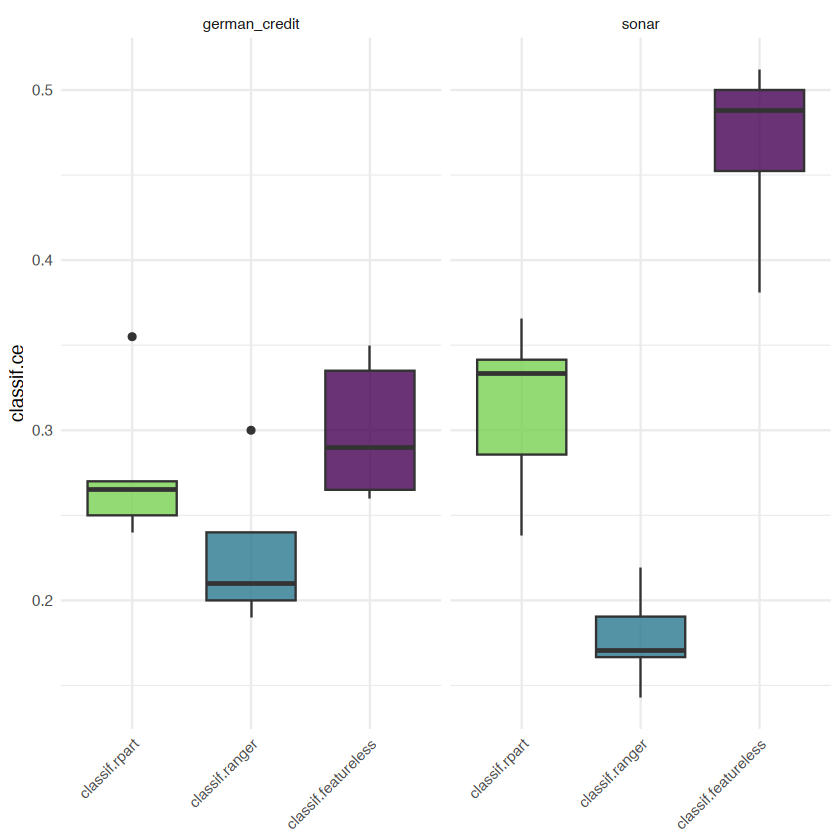

In [87]:
autoplot(bmr, measure = msr("classif.ce"))

# 二分类器评分

## 混淆矩阵

In [ ]:
tsk_german <- tsk("german_credit")
lrn_ranger <- lrn("classif.ranger", predict_type = "prob")
splits <- partition(tsk_german, ratio = 0.8)

# 训练模型
lrn_ranger$train(tsk_german, splits$train)

# 预测并计算准确率
prediction <- lrn_ranger$predict(tsk_german, splits$test)
prediction$score(msr("classif.acc"))

# classif.acc: 0.765

classif.acc 
      0.765

In [ ]:
prediction$confusion

#         truth
# response good bad
#     good  124  34
#     bad    13  29

        truth
response good bad
    good  124  34
    bad    13  29

In [94]:
library(mlr3verse)

In [ ]:
mlr3measures::confusion_matrix(
  truth = prediction$truth,
  response = prediction$response,
  positive = tsk_german$positive,
)

# truth
# response good bad
#     good  124  34
#     bad    13  29
# acc :  0.7650; ce  :  0.2350; dor :  8.1357; f1  :  0.8407 
# fdr :  0.2152; fnr :  0.0949; fomr:  0.3095; fpr :  0.5397 
# mcc :  0.4168; npv :  0.6905; ppv :  0.7848; tnr :  0.4603 
# tpr :  0.9051

        truth
response good bad
    good  124  34
    bad    13  29
acc :  0.7650; ce  :  0.2350; dor :  8.1357; f1  :  0.8407 
fdr :  0.2152; fnr :  0.0949; fomr:  0.3095; fpr :  0.5397 
mcc :  0.4168; npv :  0.6905; ppv :  0.7848; tnr :  0.4603 
tpr :  0.9051 

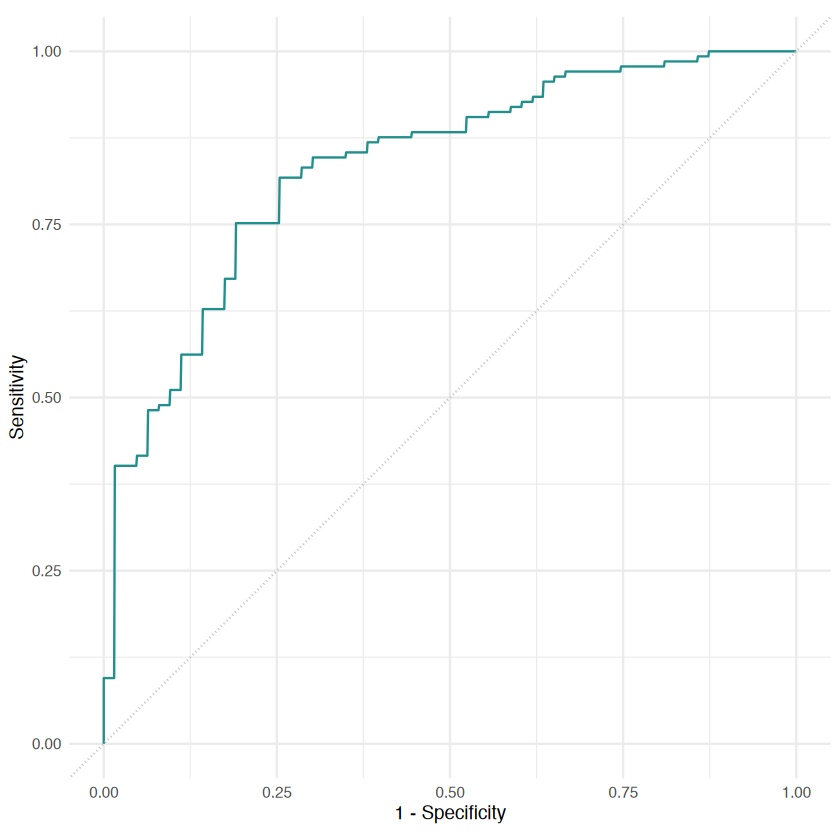

In [98]:
autoplot(prediction, type = "roc")

In [ ]:
prediction$score(msr("classif.auc"))

# classif.auc: 0.833854709767119

classif.auc 
  0.8338547

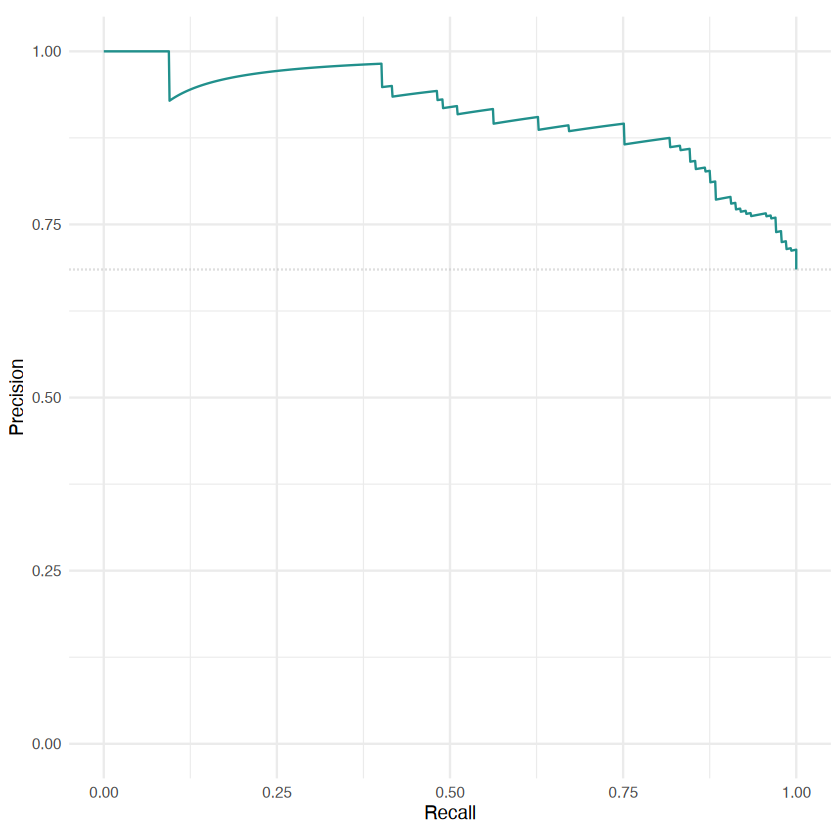

In [100]:
autoplot(prediction, type = "prc")

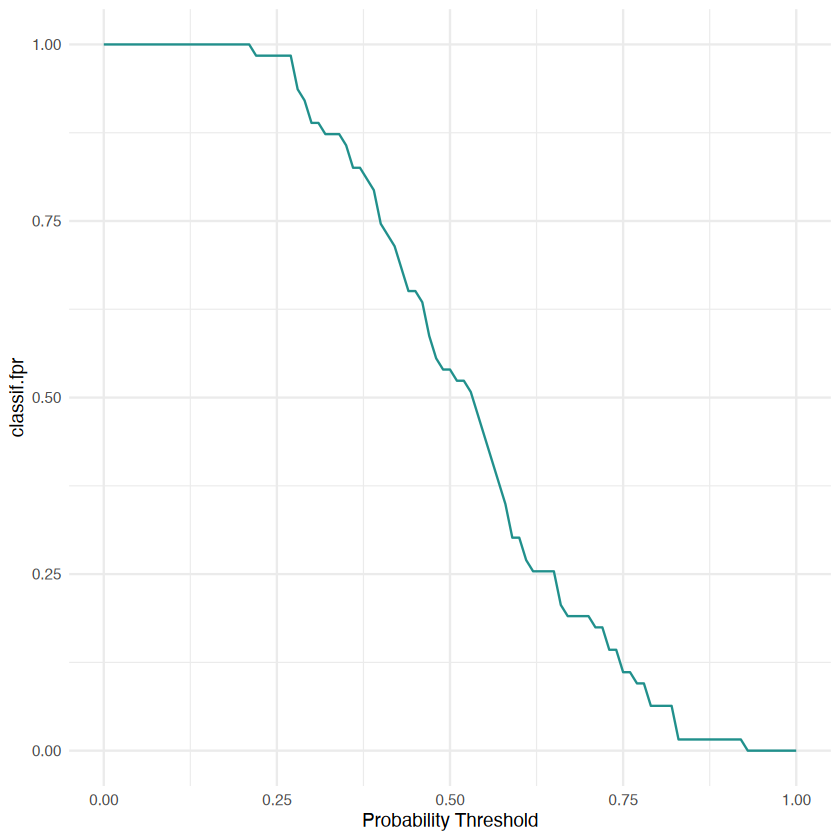

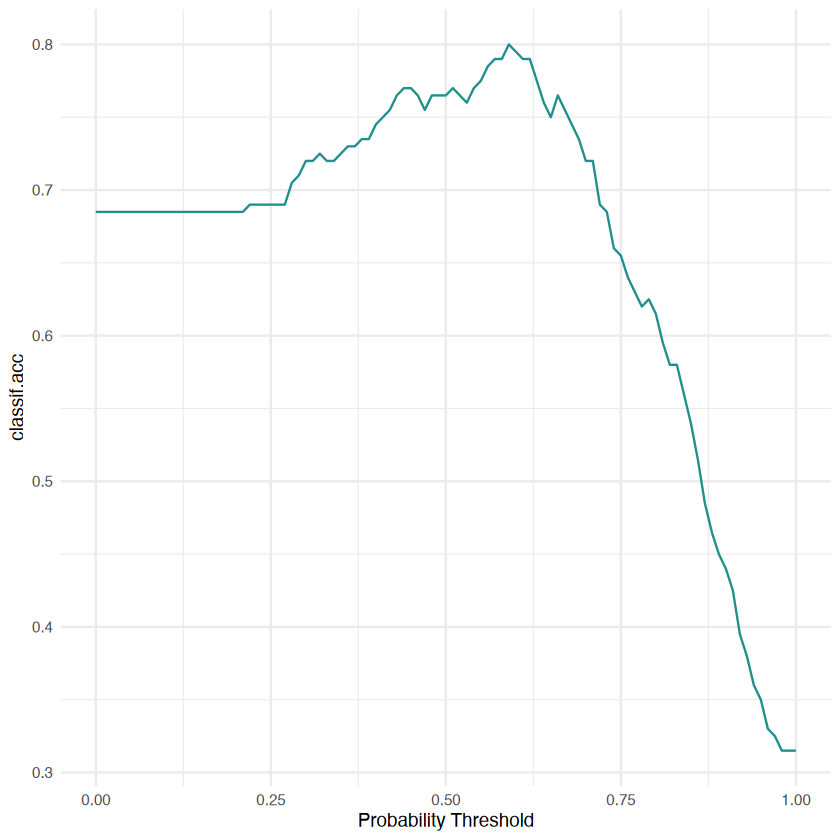

In [101]:
autoplot(prediction, type = "threshold", measure = msr("classif.fpr"))
autoplot(prediction, type = "threshold", measure = msr("classif.acc"))

INFO  [16:21:13.674] [mlr3] Applying learner 'classif.ranger' on task 'german_credit' (iter 1/5)
INFO  [16:21:13.900] [mlr3] Applying learner 'classif.ranger' on task 'german_credit' (iter 2/5)
INFO  [16:21:14.069] [mlr3] Applying learner 'classif.ranger' on task 'german_credit' (iter 3/5)
INFO  [16:21:14.241] [mlr3] Applying learner 'classif.ranger' on task 'german_credit' (iter 4/5)
INFO  [16:21:14.411] [mlr3] Applying learner 'classif.ranger' on task 'german_credit' (iter 5/5)


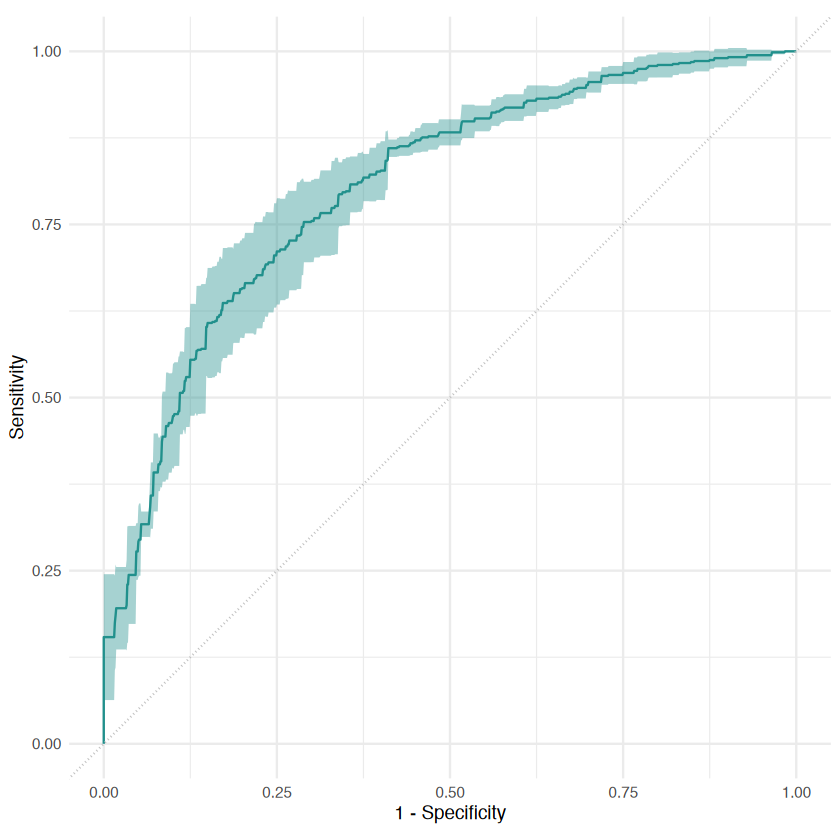

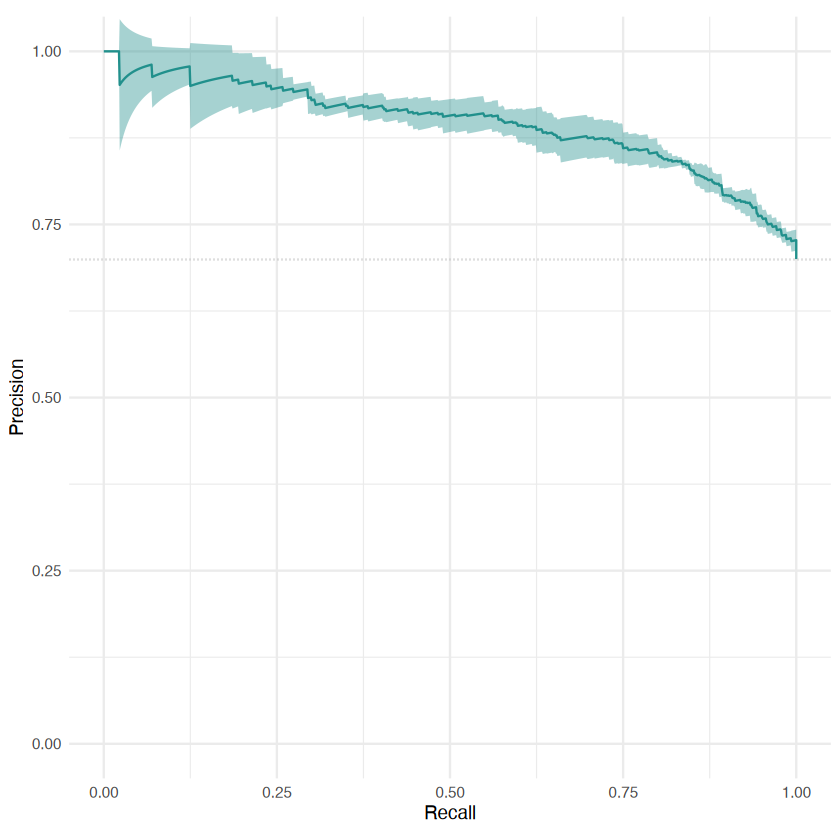

In [103]:
rr <- resample(
  task = tsk("german_credit"),
  learner = lrn("classif.ranger", predict_type = "prob"),
  resampling = rsmp("cv", folds = 5)
)
autoplot(rr, type = "roc")
autoplot(rr, type = "prc")

INFO  [16:25:46.749] [mlr3] Running benchmark with 10 resampling iterations
INFO  [16:25:46.755] [mlr3] Applying learner 'classif.rpart' on task 'german_credit' (iter 1/5)
INFO  [16:25:46.771] [mlr3] Applying learner 'classif.rpart' on task 'german_credit' (iter 2/5)
INFO  [16:25:46.789] [mlr3] Applying learner 'classif.rpart' on task 'german_credit' (iter 3/5)
INFO  [16:25:46.808] [mlr3] Applying learner 'classif.rpart' on task 'german_credit' (iter 4/5)
INFO  [16:25:46.826] [mlr3] Applying learner 'classif.rpart' on task 'german_credit' (iter 5/5)
INFO  [16:25:46.845] [mlr3] Applying learner 'classif.ranger' on task 'german_credit' (iter 1/5)
INFO  [16:25:47.048] [mlr3] Applying learner 'classif.ranger' on task 'german_credit' (iter 2/5)
INFO  [16:25:47.214] [mlr3] Applying learner 'classif.ranger' on task 'german_credit' (iter 3/5)
INFO  [16:25:47.380] [mlr3] Applying learner 'classif.ranger' on task 'german_credit' (iter 4/5)
INFO  [16:25:47.549] [mlr3] Applying learner 'classif.ra

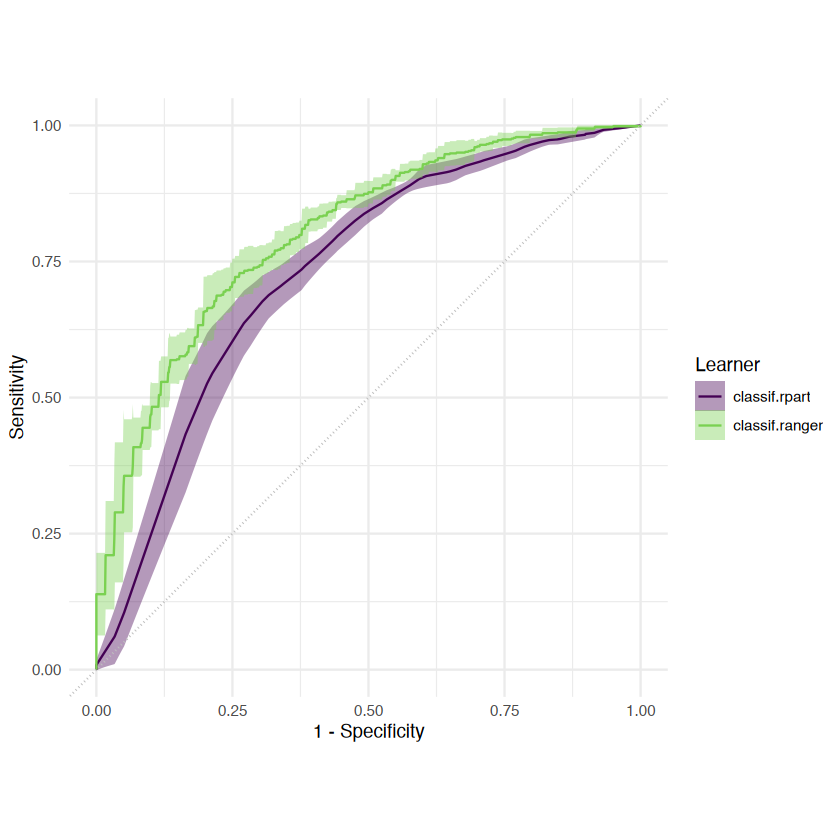

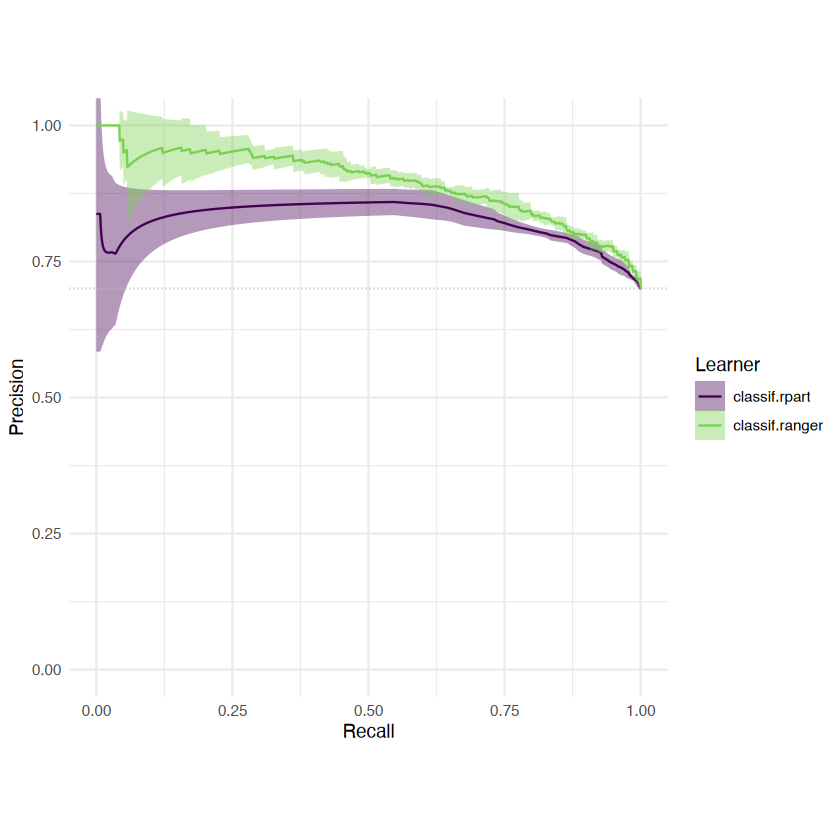

In [105]:
library(patchwork)

design <- benchmark_grid(
  tasks = tsk("german_credit"),
  learners = lrns(
    c("classif.rpart", "classif.ranger"),
    predict_type = "prob"
  ),
  resamplings = rsmp("cv", folds = 5)
)
bmr <- benchmark(design)

autoplot(bmr, type = "roc")
autoplot(bmr, type = "prc")

# 练习

## 练习1

In [ ]:
# 定义任务
tsk_mtcars <- tsk("mtcars")

# 定义学习器
lrn_rpart <- lrn("regr.rpart")

# 定义重抽样策略，5轮3折
rsmp_cv3_5 <- rsmp("repeated_cv", repeats = 3, folds = 5)

# 训练模型
rr <- resample(
  task = tsk_mtcars,
  learner = lrn_rpart,
  resampling = rsmp_cv3_5
)

# 计算MSE
mse <- rr$score(msr("regr.mse"))
mse %>% print()

#     task_id learner_id resampling_id iteration  regr.mse
#      <char>     <char>        <char>     <int>     <num>
#  1:  mtcars regr.rpart   repeated_cv         1 11.706431
#  2:  mtcars regr.rpart   repeated_cv         2  7.720288
#  3:  mtcars regr.rpart   repeated_cv         3 16.258395
#  4:  mtcars regr.rpart   repeated_cv         4 19.352055
#  5:  mtcars regr.rpart   repeated_cv         5 24.950205
#  6:  mtcars regr.rpart   repeated_cv         6 41.808284
#  7:  mtcars regr.rpart   repeated_cv         7 15.067836
#  8:  mtcars regr.rpart   repeated_cv         8  5.521953
#  9:  mtcars regr.rpart   repeated_cv         9 21.636514
# 10:  mtcars regr.rpart   repeated_cv        10 18.422361
# 11:  mtcars regr.rpart   repeated_cv        11 15.437348
# 12:  mtcars regr.rpart   repeated_cv        12 11.647249
# 13:  mtcars regr.rpart   repeated_cv        13 17.552377

INFO  [16:38:37.740] [mlr3] Applying learner 'regr.rpart' on task 'mtcars' (iter 1/15)
INFO  [16:38:37.748] [mlr3] Applying learner 'regr.rpart' on task 'mtcars' (iter 2/15)
INFO  [16:38:37.755] [mlr3] Applying learner 'regr.rpart' on task 'mtcars' (iter 3/15)
INFO  [16:38:37.762] [mlr3] Applying learner 'regr.rpart' on task 'mtcars' (iter 4/15)
INFO  [16:38:37.769] [mlr3] Applying learner 'regr.rpart' on task 'mtcars' (iter 5/15)
INFO  [16:38:37.781] [mlr3] Applying learner 'regr.rpart' on task 'mtcars' (iter 6/15)
INFO  [16:38:37.787] [mlr3] Applying learner 'regr.rpart' on task 'mtcars' (iter 7/15)
INFO  [16:38:37.793] [mlr3] Applying learner 'regr.rpart' on task 'mtcars' (iter 8/15)
INFO  [16:38:37.799] [mlr3] Applying learner 'regr.rpart' on task 'mtcars' (iter 9/15)
INFO  [16:38:37.806] [mlr3] Applying learner 'regr.rpart' on task 'mtcars' (iter 10/15)
INFO  [16:38:37.812] [mlr3] Applying learner 'regr.rpart' on task 'mtcars' (iter 11/15)
INFO  [16:38:37.818] [mlr3] Applying lear

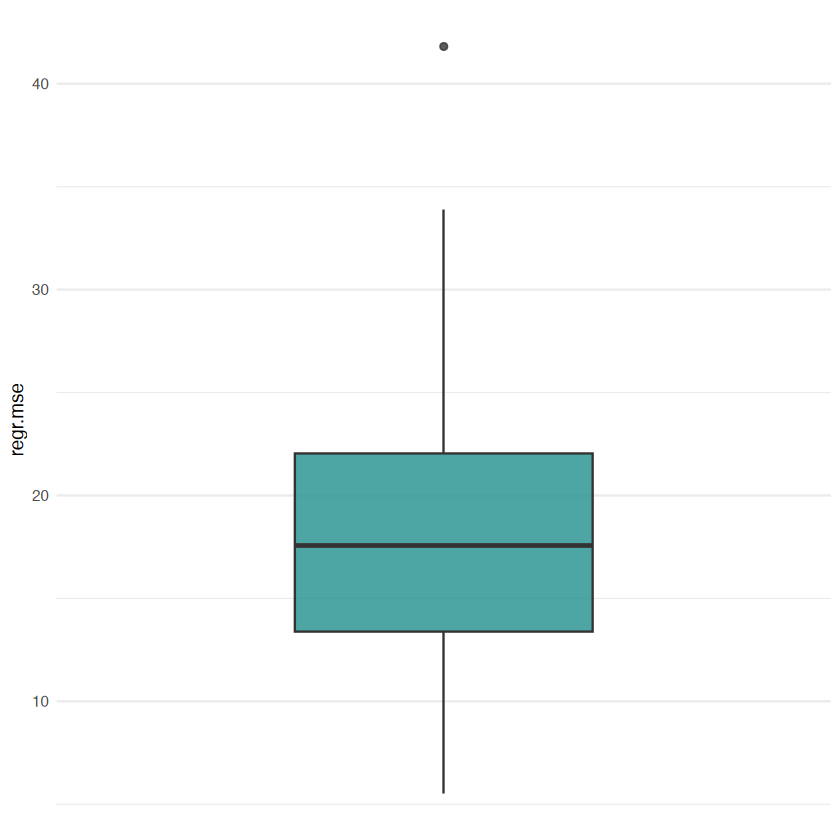

In [111]:
autoplot(rr, type = "boxplot", measure = msr("regr.mse"))

In [ ]:
# 计算聚合分数
rr$aggregate(msr("regr.mse")) %>% print()

# regr.mse 
# 18.89433 

regr.mse 
18.89433 


## 练习2

In [ ]:
# 定义种子，方便复现
set.seed(123)

# 定义任务
task <- tsk("spam")

# 定义学习器
learners <- list(
  lrn("classif.ranger", predict_type = "prob"),
  lrn("classif.log_reg", predict_type = "prob"),
  lrn("classif.xgboost", predict_type = "prob", nrounds = 100)
)

# 定义重采样策略
rspm_cv <- rsmp("cv", folds = 5)

# 定义基准设计
design <- benchmark_grid(
  tasks = task,
  learners = learners,
  resamplings = rspm_cv
)

# 执行基准测试
bmr <- benchmark(design)
bmr

# <BenchmarkResult> of 15 rows with 3 resampling runs
#  nr task_id      learner_id resampling_id iters warnings errors
#   1    spam  classif.ranger            cv     5        0      0
#   2    spam classif.log_reg            cv     5        0      0
#   3    spam classif.xgboost            cv     5        0      0

INFO  [17:01:48.604] [mlr3] Running benchmark with 15 resampling iterations
INFO  [17:01:48.611] [mlr3] Applying learner 'classif.ranger' on task 'spam' (iter 1/5)
INFO  [17:01:49.669] [mlr3] Applying learner 'classif.ranger' on task 'spam' (iter 2/5)
INFO  [17:01:50.850] [mlr3] Applying learner 'classif.ranger' on task 'spam' (iter 3/5)
INFO  [17:01:51.806] [mlr3] Applying learner 'classif.ranger' on task 'spam' (iter 4/5)
INFO  [17:01:52.765] [mlr3] Applying learner 'classif.ranger' on task 'spam' (iter 5/5)
INFO  [17:01:53.910] [mlr3] Applying learner 'classif.log_reg' on task 'spam' (iter 1/5)
INFO  [17:01:54.084] [mlr3] Applying learner 'classif.log_reg' on task 'spam' (iter 2/5)
INFO  [17:01:54.366] [mlr3] Applying learner 'classif.log_reg' on task 'spam' (iter 3/5)
INFO  [17:01:54.539] [mlr3] Applying learner 'classif.log_reg' on task 'spam' (iter 4/5)
INFO  [17:01:54.707] [mlr3] Applying learner 'classif.log_reg' on task 'spam' (iter 5/5)
INFO  [17:01:54.882] [mlr3] Applying le

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


INFO  [17:01:58.705] [mlr3] Finished benchmark


<BenchmarkResult> of 15 rows with 3 resampling runs
 nr task_id      learner_id resampling_id iters warnings errors
  1    spam  classif.ranger            cv     5        0      0
  2    spam classif.log_reg            cv     5        0      0
  3    spam classif.xgboost            cv     5        0      0

In [ ]:
# 查看auc的表现
bmr$aggregate(msr("classif.auc")) %>% print()

# nr task_id      learner_id resampling_id iters classif.auc
#    <int>  <char>          <char>        <char> <int>       <num>
# 1:     1    spam  classif.ranger            cv     5   0.9852204
# 2:     2    spam classif.log_reg            cv     5   0.9714586
# 3:     3    spam classif.xgboost            cv     5   0.9883931
# Hidden columns: resample_result

      nr task_id      learner_id resampling_id iters classif.auc
   <int>  <char>          <char>        <char> <int>       <num>
1:     1    spam  classif.ranger            cv     5   0.9852204
2:     2    spam classif.log_reg            cv     5   0.9714586
3:     3    spam classif.xgboost            cv     5   0.9883931
Hidden columns: resample_result


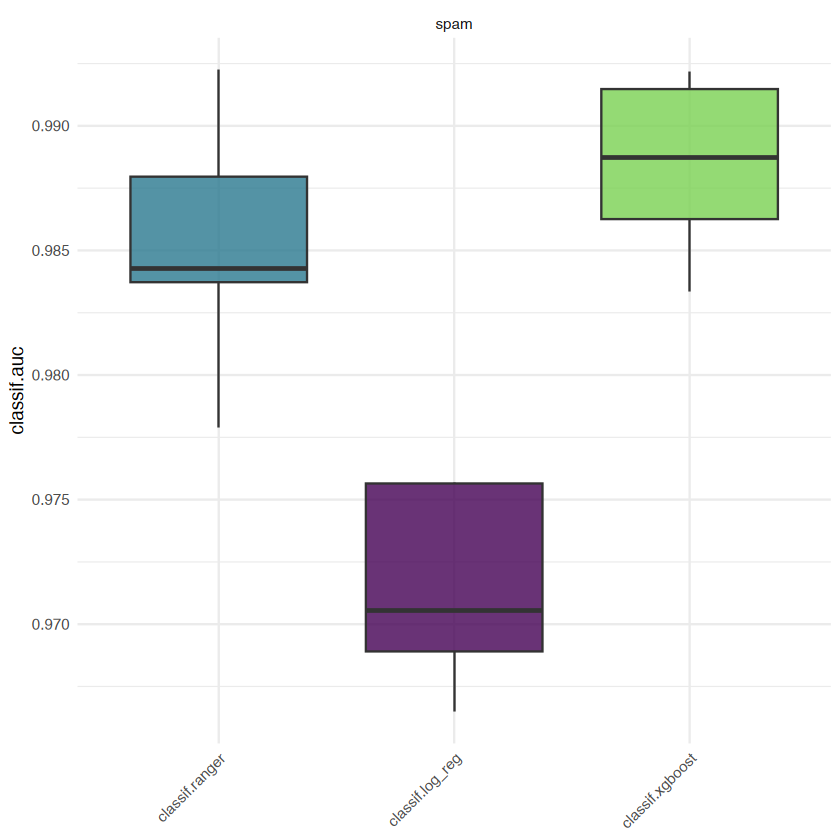

In [118]:
autoplot(bmr, type = "boxplot", measure = msr("classif.auc"))

In [ ]:
# 定义种子，方便复现
set.seed(12345)

# 定义任务
task <- tsk("spam")

# 定义学习器
learners <- list(
  lrn("classif.ranger", predict_type = "prob"),
  lrn("classif.log_reg", predict_type = "prob"),
  lrn("classif.xgboost", predict_type = "prob", nrounds = 100)
)

# 定义重采样策略
rspm_cv <- rsmp("cv", folds = 5)

# 定义基准设计
design <- benchmark_grid(
  tasks = task,
  learners = learners,
  resamplings = rspm_cv
)

# 执行基准测试
bmr <- benchmark(design)

# 查看auc的表现
bmr$aggregate(msr("classif.auc")) %>% print()

#       nr task_id      learner_id resampling_id iters classif.auc
#    <int>  <char>          <char>        <char> <int>       <num>
# 1:     1    spam  classif.ranger            cv     5   0.9863210
# 2:     2    spam classif.log_reg            cv     5   0.9707916
# 3:     3    spam classif.xgboost            cv     5   0.9885732
# Hidden columns: resample_result

INFO  [17:07:51.756] [mlr3] Running benchmark with 15 resampling iterations
INFO  [17:07:51.771] [mlr3] Applying learner 'classif.ranger' on task 'spam' (iter 1/5)
INFO  [17:07:52.795] [mlr3] Applying learner 'classif.ranger' on task 'spam' (iter 2/5)
INFO  [17:07:53.760] [mlr3] Applying learner 'classif.ranger' on task 'spam' (iter 3/5)
INFO  [17:07:54.711] [mlr3] Applying learner 'classif.ranger' on task 'spam' (iter 4/5)
INFO  [17:07:55.694] [mlr3] Applying learner 'classif.ranger' on task 'spam' (iter 5/5)
INFO  [17:07:56.644] [mlr3] Applying learner 'classif.log_reg' on task 'spam' (iter 1/5)
INFO  [17:07:56.818] [mlr3] Applying learner 'classif.log_reg' on task 'spam' (iter 2/5)
INFO  [17:07:56.988] [mlr3] Applying learner 'classif.log_reg' on task 'spam' (iter 3/5)
INFO  [17:07:57.302] [mlr3] Applying learner 'classif.log_reg' on task 'spam' (iter 4/5)
INFO  [17:07:57.467] [mlr3] Applying learner 'classif.log_reg' on task 'spam' (iter 5/5)
INFO  [17:07:57.635] [mlr3] Applying le

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


INFO  [17:08:01.401] [mlr3] Finished benchmark
      nr task_id      learner_id resampling_id iters classif.auc
   <int>  <char>          <char>        <char> <int>       <num>
1:     1    spam  classif.ranger            cv     5   0.9863210
2:     2    spam classif.log_reg            cv     5   0.9707916
3:     3    spam classif.xgboost            cv     5   0.9885732
Hidden columns: resample_result


## 练习3

In [ ]:
# 定义任务
tsk_penguins <- tsk("penguins")

# 定义学习器
lrn_rpart <- lrn("classif.rpart")

# 定义重采样策略，使用factor自定义
folds <- as.factor(tsk_penguins$row_ids %% 3)
rsmp_custom_cv <- rsmp("custom_cv")
rsmp_custom_cv$instantiate(tsk_penguins, f = folds)

# 训练模型
rr <- resample(
  task = tsk_penguins,
  learner = lrn_rpart,
  resampling = rsmp_custom_cv
)

# 性能评估
rr$aggregate(msr("classif.acc")) %>% print()

# classif.acc
#   0.9419527

INFO  [17:14:50.455] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/3)
INFO  [17:14:50.477] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 2/3)
INFO  [17:14:50.490] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 3/3)
classif.acc 
  0.9419527 


# 练习4

In [131]:
# 定义任务
tsk_penguins <- tsk("spam")

# 定义学习器
lrn_rpart <- lrn("classif.rpart", predict_type = "prob")

# 分割数据集
splits <- partition(tsk_penguins, ratio = 0.8)

# 训练模型
lrn_rpart$train(tsk_penguins, splits$train)

# 预测
prediction <- lrn_rpart$predict(tsk_penguins, splits$test)

# 设置阈值
prediction$set_threshold(0.5)

# 计算准确率
prediction$score(msrs(c("classif.tpr", "classif.fpr"))) %>% class()

[1] "numeric"

In [ ]:
my_roc_plot <- function(task, learner, train_indices, test_indices) {
  # 定义参数
  # 阈值迭代区间
  thresholds <- seq(0, 1, by = 0.01)
  # 定义空数据框
  df_roc <- data.frame(
    threshold = thresholds,
    tpr = numeric(length(thresholds)),
    fpr = numeric(length(thresholds))
  )

  # 训练模型
  learner$train(task, train_indices)

  # 预测
  prediction <- learner$predict(task, test_indices)

  # 迭代阈值计算TPR和FPR
  for (i in thresholds) {
    prediction$set_threshold(i)
    df_roc[df_roc$threshold == i, "tpr"] <- prediction$score(msr("classif.tpr"))
    df_roc[df_roc$threshold == i, "fpr"] <- prediction$score(msr("classif.fpr"))
  }

  # 根据FPR排序
  df_roc <- df_roc[order(df_roc$fpr), ]

  # 绘制ROC曲线
  library(ggplot2)
  library(ggsci)
  ggplot(df_roc, aes(x = fpr, y = tpr)) +
    geom_line() +
    geom_abline(slope = 1, intercept = 0, linetype = "dashed") +
    labs(
      title = "ROC Curve",
      x = "False Positive Rate (FPR)",
      y = "True Positive Rate (TPR)"
    ) +
    theme_minimal() +
    # 使用npg
    scale_color_npg() +
    scale_fill_npg()
}

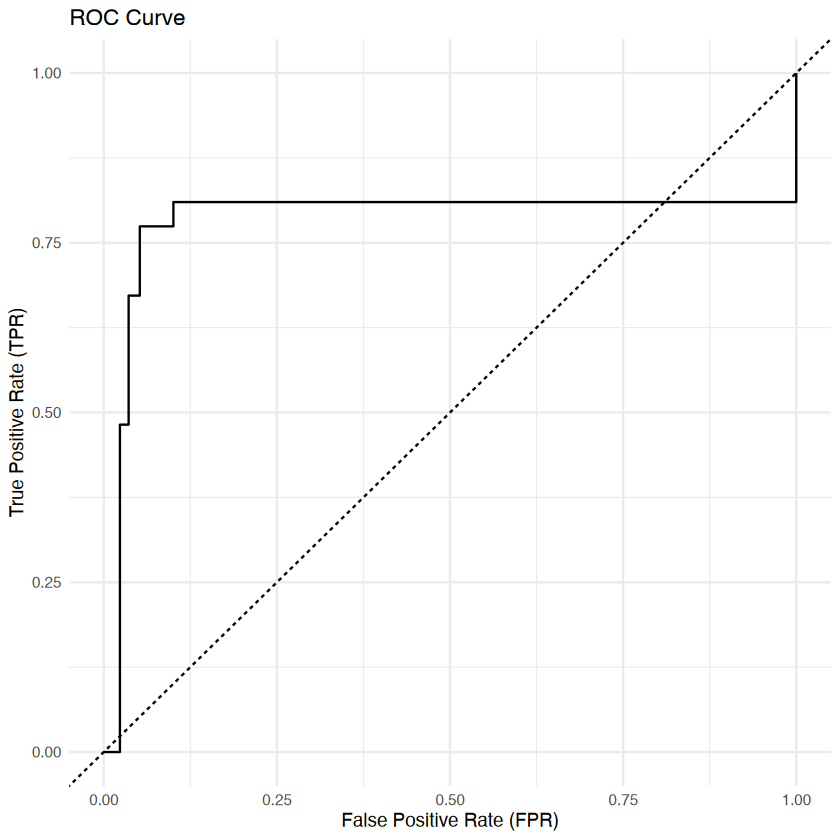

In [146]:
# 定义任务
tsk_penguins <- tsk("spam")

# 定义学习器
lrn_rpart <- lrn("classif.rpart", predict_type = "prob")

# 分割数据集
splits <- partition(tsk_penguins, ratio = 0.8)

# 提取索引
train_indices <- splits$train
test_indices <- splits$test

# 绘制ROC曲线
my_roc_plot(tsk_penguins, lrn_rpart, train_indices, test_indices)